# EDA

In [1]:
# Library for EDA
import pandas as pd
import numpy as np 
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.impute import SimpleImputer

In [2]:
# Import datasets

df_stores = pd.read_csv('stores.csv')
df_trans = pd.read_csv('transactions.csv')
df_holi = pd.read_csv('holidays_events.csv')
df_oil = pd.read_csv('oil.csv')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
# combine the datasets on common columns

merged_data = pd.merge(df_train, df_trans, on=['date', 'store_nbr'])
# Merge Holiday data to previous merged data on date column
merged_data2 = pd.merge(merged_data, df_holi, on='date')
# Merge Oil data to previous merged data on date column
merged_data3 = pd.merge(merged_data2, df_oil, on='date')
# Merge Store data to previous merged data on store_nbr column

merged_data4 = pd.merge(merged_data3, df_stores, on='store_nbr')
# Preview Merged data
merged_data4.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1


In [5]:
# Rename columns using the rename method
new_merged_data = merged_data4.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [6]:
new_merged_data.date = pd.to_datetime(new_merged_data.date)


new_merged_data['year'] = new_merged_data.date.dt.year

new_merged_data['month'] = new_merged_data.date.dt.month


new_merged_data['dayofmonth'] = new_merged_data.date.dt.day


new_merged_data['dayofweek'] = new_merged_data.date.dt.dayofweek


new_merged_data['dayname'] = new_merged_data.date.dt.strftime('%A')

In [7]:
new_merged_data['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [8]:
new_merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,...,dcoilwtico,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday


In [9]:
new_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   transactions  322047 non-null  int64         
 7   holiday_type  322047 non-null  object        
 8   locale        322047 non-null  object        
 9   locale_name   322047 non-null  object        
 10  description   322047 non-null  object        
 11  transferred   322047 non-null  bool          
 12  dcoilwtico    300003 non-null  float64       
 13  city          322047 non-null  object        
 14  state         322047 non-null  object        
 15  store_type    322

In [10]:
new_merged_data.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
transactions        0
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
dcoilwtico      22044
city                0
state               0
store_type          0
cluster             0
year                0
month               0
dayofmonth          0
dayofweek           0
dayname             0
dtype: int64

### Does training data has all required dates?

In [11]:
# Check for missing values
if df_train.isnull().values.any():
  print("The dataset is not complete. There are missing values.")

# Check for missing dates in a time-series dataset
if not df_train.index.is_unique:
  print("The dataset is not complete. There are duplicate dates.")
else:
  print("The dataset is complete.")

The dataset is complete.


### Which dates have the lowest and highest sales for each year?

In [12]:
# Group the data by year and get the minimum and maximum sales for each year
grouped_by_year = new_merged_data.groupby("year")["sales"].agg(["min", "max"])

In [13]:
# Get the dates corresponding to the minimum and maximum sales for each year
result = pd.concat([new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "min"]][["year", "date"]].rename(columns={"date": "date_min"}) for year in grouped_by_year.index] +
                  [new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "max"]][["year", "date"]].rename(columns={"date": "date_max"}) for year in grouped_by_year.index])

# Set the index to be the year
result = result.set_index("year")

# Group the data by year to get the minimum and maximum sales on separate rows
result = result.groupby(level=0).agg({"date_min": "first", "date_max": "first"})

# Reset the index to get a regular dataframe
result = result.reset_index()

print(result)

   year   date_min   date_max
0  2013 2013-01-01 2013-11-12
1  2014 2014-01-01 2014-12-08
2  2015 2015-01-01 2015-11-11
3  2016 2016-02-08 2016-05-02
4  2017 2017-01-02 2017-01-02


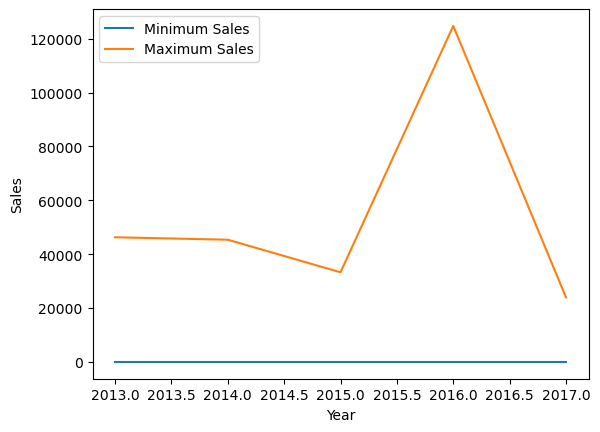

In [14]:
# Group the data by year and get the minimum and maximum sales for each year
grouped_by_year = new_merged_data.groupby("year")["sales"].agg(["min", "max"])

# Get the dates corresponding to the minimum and maximum sales for each year
result = pd.concat([new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "min"]][["year", "date"]].rename(columns={"date": "date_min"}) for year in grouped_by_year.index] +
                  [new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "max"]][["year", "date"]].rename(columns={"date": "date_max"}) for year in grouped_by_year.index])

# Set the index to be the year
result = result.set_index("year")

# Group the data by year to get the minimum and maximum sales on separate rows
result = result.groupby(level=0).agg({"date_min": "first", "date_max": "first"})

# Reset the index to get a regular dataframe
result = result.reset_index()

# Plot the minimum and maximum sales for each year
plt.plot(result["year"], grouped_by_year["min"], label="Minimum Sales")
plt.plot(result["year"], grouped_by_year["max"], label="Maximum Sales")

# Add a legend
plt.legend()

# Add axis labels
plt.xlabel("Year")
plt.ylabel("Sales")

# Show the plot
plt.show()

### Are certain groups of stores selling more products? (Cluster, city, state, type)

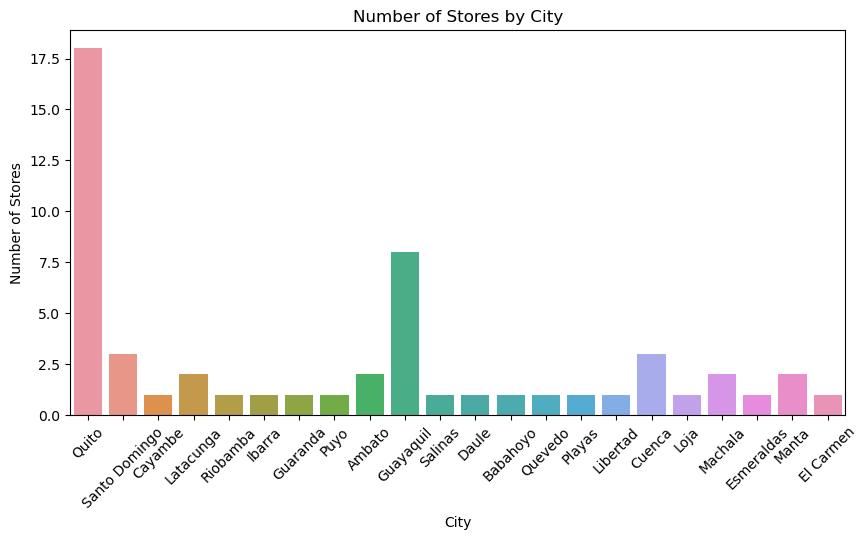

In [15]:
df_stores.sample(5, random_state = 0)
# Plot the number of stores by city
plt.figure(figsize=(10, 5))
sns.countplot(x='city', data=df_stores)

# Add title and labels
plt.title("Number of Stores by City")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

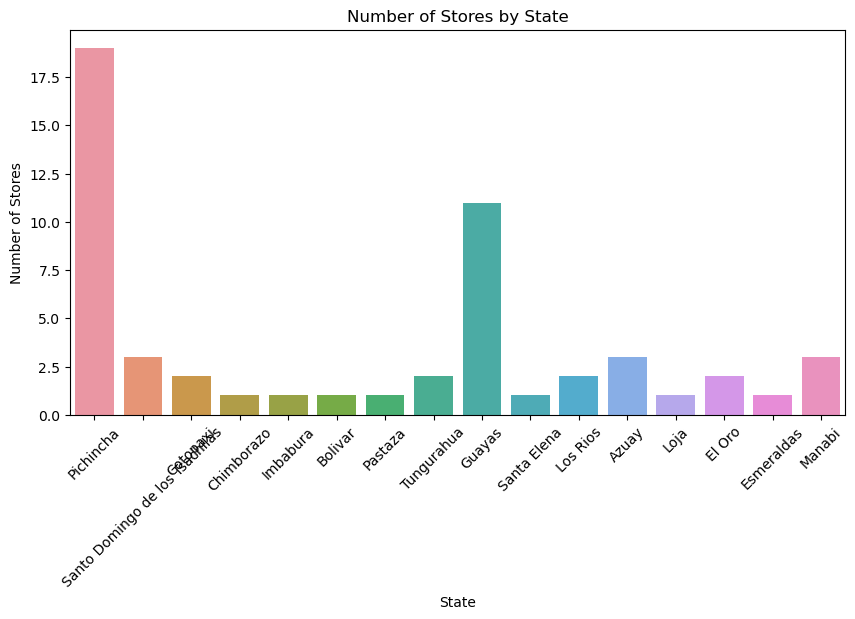

In [16]:
# Plot the number of stores by state
plt.figure(figsize=(10, 5))
sns.countplot(x='state', data=df_stores)

# Add title and labels
plt.title("Number of Stores by State")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

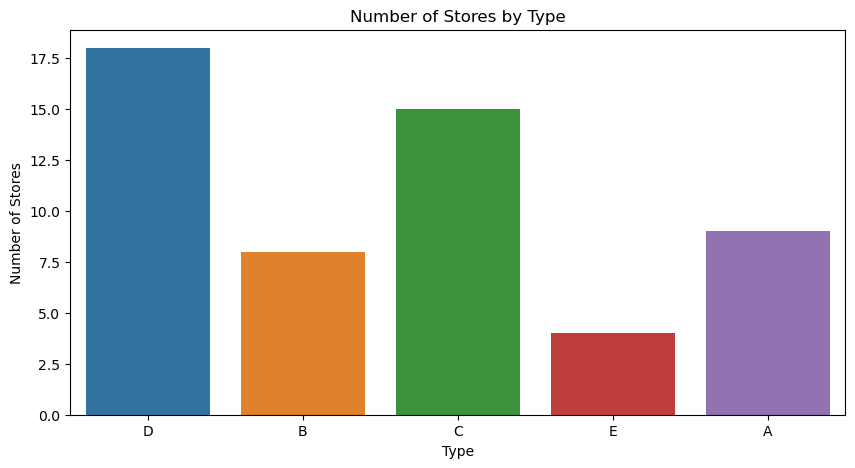

In [17]:
# Plot the number of stores by type
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df_stores)

# Add title and labels
plt.title("Number of Stores by Type")
plt.xlabel("Type")
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

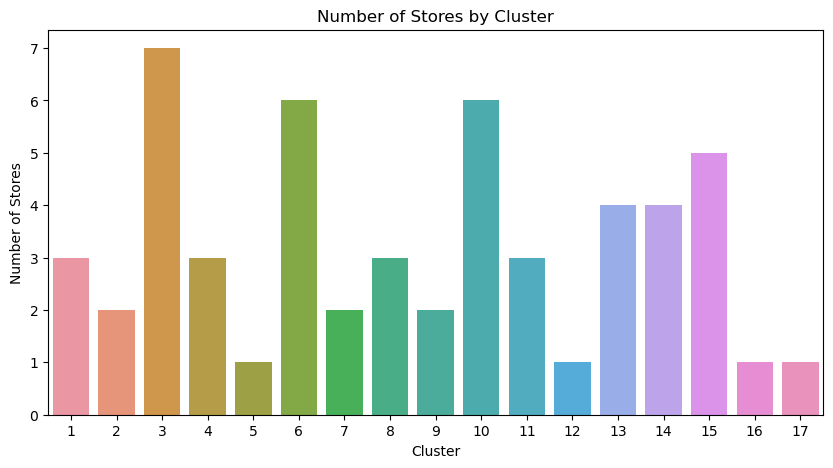

In [18]:
# Plot the number of stores by cluster
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=df_stores)

# Add title and labels
plt.title("Number of Stores by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

### What analysis can we get from the date and its extractable features?

In [19]:
# create a copy of the dataframe
df_train_copy = df_train.copy()

df_train_copy.date = pd.to_datetime(df_train_copy.date)

# extract year, quarter, month, day, and weekday information from the date column
df_train_copy['year'] = df_train_copy['date'].dt.year
df_train_copy['quarter'] = df_train_copy['date'].dt.quarter
df_train_copy['month'] = df_train_copy['date'].dt.month
df_train_copy['day'] = df_train_copy['date'].dt.day
df_train_copy['weekday'] = df_train_copy['date'].dt.weekday

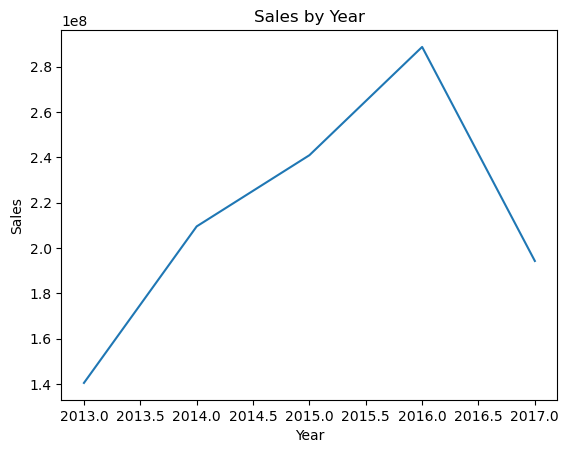

In [20]:
# group sales data by year
grouped_by_year = df_train_copy.groupby('year').sum()

# plot the aggregated sales data by year
plt.plot(grouped_by_year.index, grouped_by_year['sales'])
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales by Year")
plt.show()

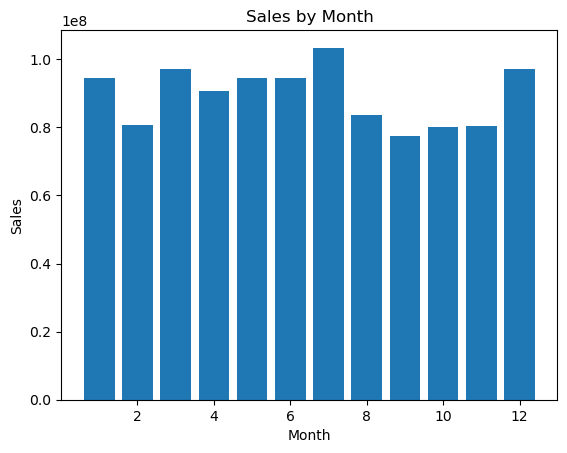

In [21]:
# group sales data by month
grouped_by_month = df_train_copy.groupby('month').sum()

# plot the aggregated sales data by month
plt.bar(grouped_by_month.index, grouped_by_month['sales'])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales by Month")
plt.show()

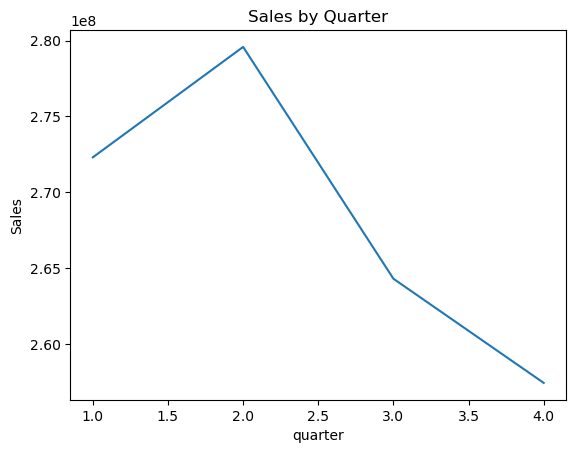

In [22]:
# group sales data by year
grouped_by_quarter = df_train_copy.groupby('quarter').sum()

# plot the aggregated sales data by quarter
plt.plot(grouped_by_quarter.index, grouped_by_quarter['sales'])
plt.xlabel("quarter")
plt.ylabel("Sales")
plt.title("Sales by Quarter")
plt.show()

### What is the relationship between oil prices and sales?

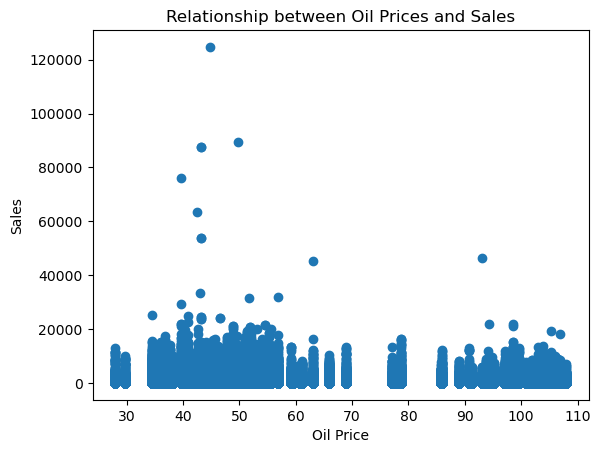

In [23]:
# Plot a scatter plot to visualize the relationship between oil prices and sales
plt.scatter(new_merged_data['dcoilwtico'], new_merged_data['sales'])
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.title('Relationship between Oil Prices and Sales')
plt.show()

### What is the relationship between product and sales?

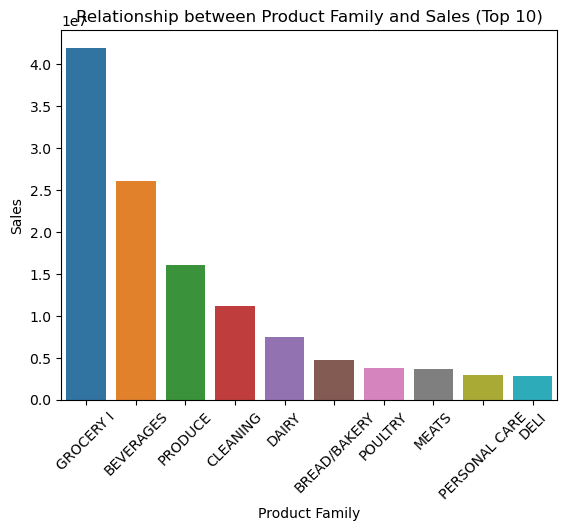

In [24]:
# Group data by product family and sum the sales
grouped_data_1 = new_merged_data.groupby('family').sum()['sales']

# Sort the data by sales
grouped_data_1 = grouped_data_1.sort_values(ascending=False)

# Plot the top 10 product families
sns.barplot(x=grouped_data_1.index[:10], y=grouped_data_1.values[:10])

# Add labels and title
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.title('Relationship between Product Family and Sales (Top 10)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### What is the trend of sales overtime

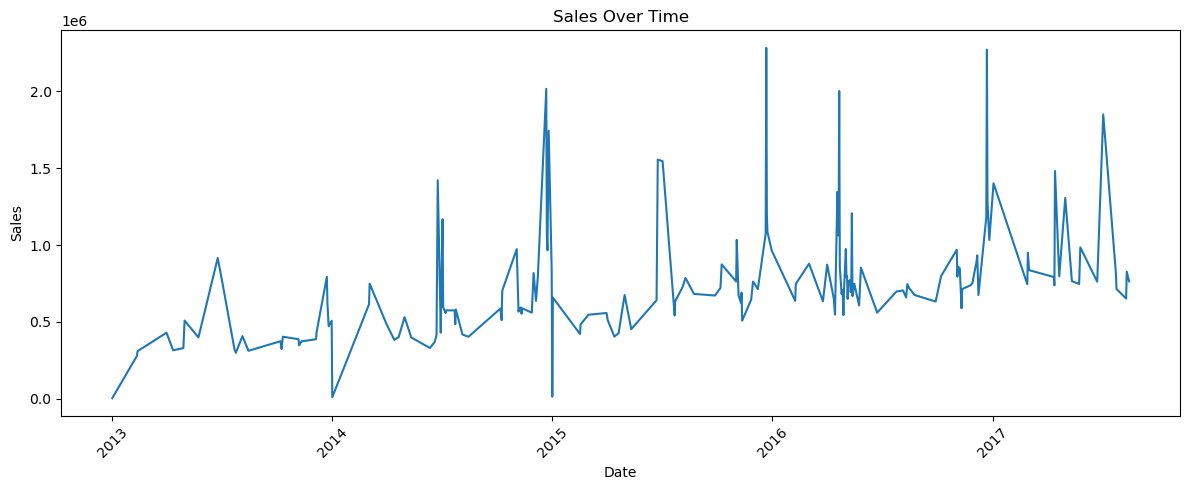

In [25]:
# Group data by date and sum the sales
date_group = new_merged_data.groupby("date").sum()

# Plot the sales over time
plt.figure(figsize=(12,5))
plt.plot(date_group.index, date_group["sales"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Processing & Engineering

### Drop Duplicates

In [26]:
new_merged_data.duplicated().sum()

# Drop the specified columns
new_merged_data = new_merged_data.drop(columns=["year", "month", "dayofmonth", "dayofweek", "dayname"])
new_merged_data

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000685,2017-08-15,52,POULTRY,397.340,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322043,3000686,2017-08-15,52,PREPARED FOODS,104.418,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322044,3000687,2017-08-15,52,PRODUCE,3803.368,8,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322045,3000688,2017-08-15,52,SCHOOL AND OFFICE SUPPLIES,17.000,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11


### New Features Creation

In [27]:
new_merged_data.date = pd.to_datetime(new_merged_data.date)


new_merged_data['year'] = new_merged_data.date.dt.year

new_merged_data['month'] = new_merged_data.date.dt.month


new_merged_data['dayofmonth'] = new_merged_data.date.dt.day


new_merged_data['dayofweek'] = new_merged_data.date.dt.dayofweek


new_merged_data['dayname'] = new_merged_data.date.dt.strftime('%A')
# Preview data with new features
new_merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,...,dcoilwtico,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday


### Impute Missing Values

In [28]:
from sklearn.impute import SimpleImputer

# create an instance of the SimpleImputer class with mean strategy
imputer = SimpleImputer(strategy='mean')

# fit the imputer to the dcoilwtico column of new_merged_data
imputer.fit(new_merged_data[['dcoilwtico']])

# use the imputer to transform the dcoilwtico column of new_merged_data, replacing missing values with the mean value
new_merged_data['dcoilwtico'] = imputer.transform(new_merged_data[['dcoilwtico']])
# Preview data columns after imputing
new_merged_data.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
transactions    0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
city            0
state           0
store_type      0
cluster         0
year            0
month           0
dayofmonth      0
dayofweek       0
dayname         0
dtype: int64

In [29]:
# Write the DataFrame to a CSV file
new_merged_data.to_csv('new_merged_data.csv', index=False)

In [30]:
# drop unnecessary columns

final_data = new_merged_data.drop(columns=['id','locale', 'locale_name', 'description', 'transferred'], inplace=True)
new_merged_data.head()
# set the date column as the index
new_merged_data.set_index('date', inplace=True)
new_merged_data.head()
# drop more columns

final_data = new_merged_data.drop(columns=['state',  'store_type', 'dayname'], inplace=True)
final_data = new_merged_data.copy()
final_data.head()
# categorizing the products
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
final_data['family'] = np.where(final_data['family'].isin(food_families), 'FOODS', final_data['family'])
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
final_data['family'] = np.where(final_data['family'].isin(home_families), 'HOME', final_data['family'])
clothing_families = ['LINGERIE', 'LADYSWARE']
final_data['family'] = np.where(final_data['family'].isin(clothing_families), 'CLOTHING', final_data['family'])
grocery_families = ['GROCERY I', 'GROCERY II']
final_data['family'] = np.where(final_data['family'].isin(grocery_families), 'GROCERY', final_data['family'])
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
final_data['family'] = np.where(final_data['family'].isin(stationery_families), 'STATIONERY', final_data['family'])
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE']
final_data['family'] = np.where(final_data['family'].isin(cleaning_families), 'CLEANING', final_data['family'])
hardware_families = ['PLAYERS AND ELECTRONICS','HARDWARE']
final_data['family'] = np.where(final_data['family'].isin(hardware_families), 'HARDWARE', final_data['family'])
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler
scaler = StandardScaler()

# select numerical columns
num_cols = ['sales', 'transactions', 'dcoilwtico', 'year', 'month', 'dayofmonth', 'dayofweek']

# fit and transform the numerical columns
final_data[num_cols] = scaler.fit_transform(final_data[num_cols])

### Features Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
categorical_columns = ["family", "city", "holiday_type"]
categorical_data = final_data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data to one hot encoding
one_hot_encoded_data = encoder.fit_transform(categorical_data)

# Get the categories for each column
categories = [encoder.categories_[i] for i in range(len(encoder.categories_))]

# Create the column names for the one hot encoded data
column_names = []
for i in range(len(categories)):
    for j in range(len(categories[i])):
        column_names.append(f'{categorical_columns[i]}_{categories[i][j]}')

# Convert the one hot encoding data to a DataFrame
one_hot_encoded_data = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)


# Reset the index of both dataframes
final_data = final_data.reset_index(drop=True)
one_hot_encoded_data = one_hot_encoded_data.reset_index(drop=True)

# Concatenate the original dataframe with the one hot encoded data
final_data_encoded = pd.concat([final_data, one_hot_encoded_data], axis=1)

# Drop the original categorical columns
final_data_encoded.drop(categorical_columns, axis=1, inplace=True)
final_data_encoded.head()

,store_nbr,sales,onpromotion,transactions,dcoilwtico,cluster,year,month,dayofmonth,dayofweek,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,-0.324316,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25,0.323701,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


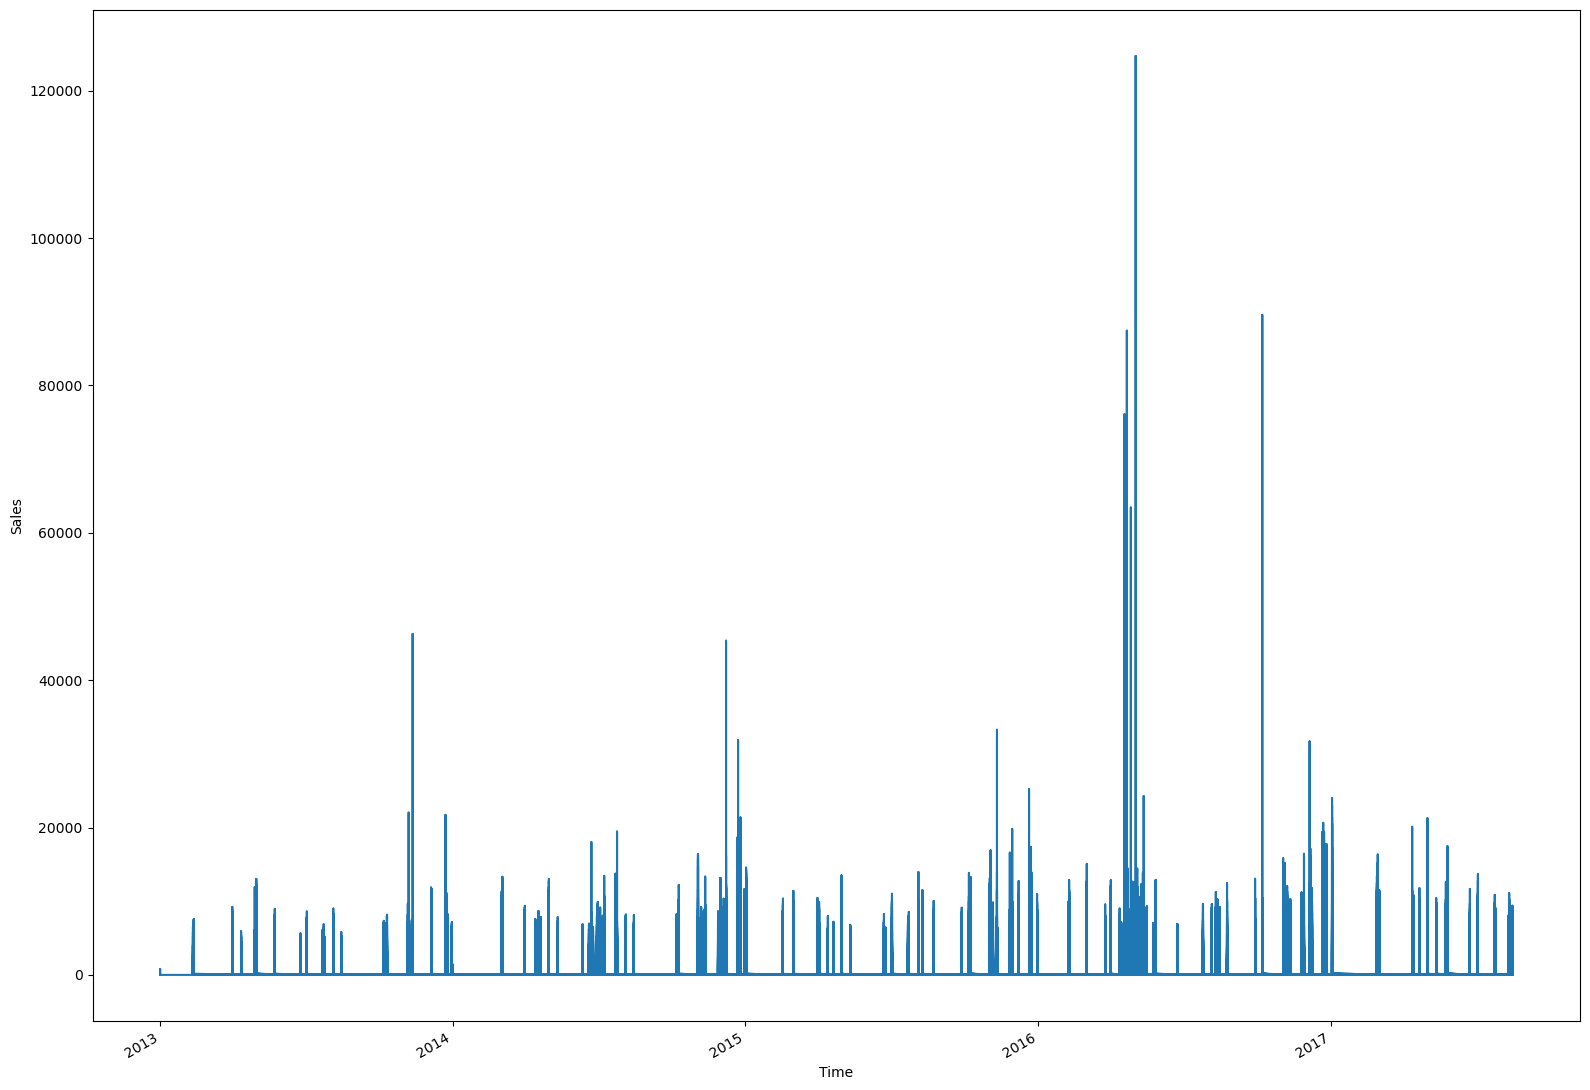

In [32]:
#Rename dcoilwtico column to oil price

final_data_encoded.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)
final_data_encoded.head()
# Make a copy of the final_data_encoded as data
data = final_data_encoded.copy()
data.head()
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(new_merged_data['sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
fig.autofmt_xdate()
plt.tight_layout()
# Write the DataFrame to a CSV file
data.to_csv('encoded_data.csv', index=False)

# Modelling

### Create and Train the Model

In [33]:
!pip install xgboost

In [34]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
# Split Data to train and Test
from sklearn.model_selection import train_test_split

# Create the feature dataframe using the selected columns
X = data.drop(["sales"], axis=1)

# Get the target variable
y = data.sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model

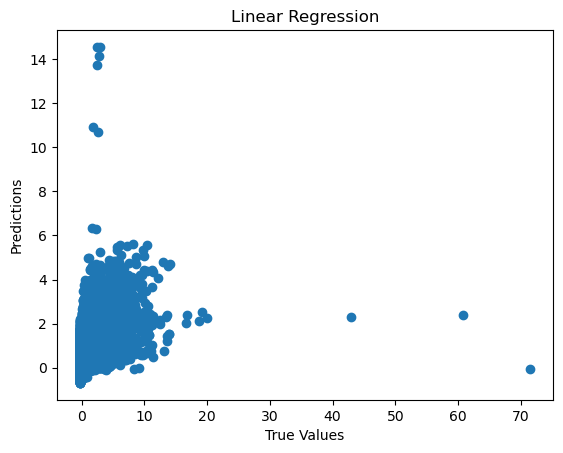


Evaluation Results for Linear Regression:
MSE: 0.72
RMSE: 0.85
RMSLE: 0.26


In [35]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make prediction on X_test
lr_predictions = lr.predict(X_test)
plt.scatter(y_test, lr_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.show()
# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions).round(2)
lr_rmse = np.sqrt(lr_mse).round(2)
# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_test)
lr_predictions_abs = abs(lr_predictions)
# calculate the mean squared logarithmic error using the new y_test_abs and lr_predictions_abs array
lr_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs)).round(2)
# Print the evaluation results for Linear Regression model
print("\nEvaluation Results for Linear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("RMSLE:", lr_rmsle)

### Decision Tree Regression Model

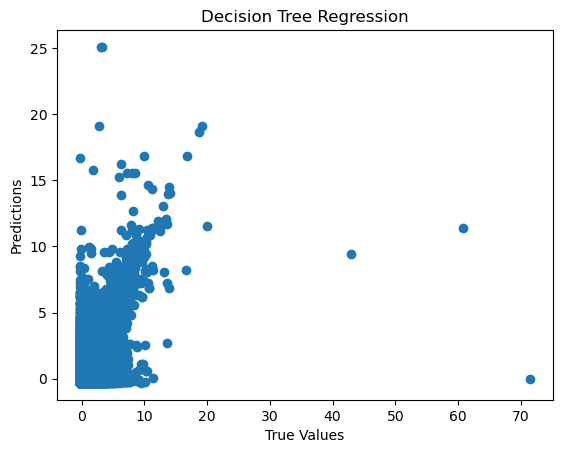


Evaluation Results for Decision Tree Regression:
MSE: 0.61
RMSE: 0.78
RMLSE: 0.24


In [36]:
# Decision Tree Regression Model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make prediction on X_test
dt_predictions = dt.predict(X_test)
plt.scatter(y_test, dt_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Decision Tree Regression")
plt.show()
# Evaluation Metrics for Decision Tree Regression
dt_mse = mean_squared_error(y_test, dt_predictions).round(2)
dt_rmse = np.sqrt(dt_mse).round(2)
# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
dt_predictions_abs = abs(dt_predictions)
# calculate the mean squared logarithmic error using the new y_test_abs and dt_predictions_abs array

dt_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, dt_predictions_abs)).round(2)
# Print the evaluation results for Decision Tree Regression model
print("\nEvaluation Results for Decision Tree Regression:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)

print("RMLSE:", dt_rmsle)